In [56]:
using ControlSystems
using RobustAndOptimalControl
using LinearAlgebra
using Plots

In [27]:
n = 2
A = [
    0 1
    0 0
]

2×2 Matrix{Int64}:
 0  1
 0  0

In [3]:
B = [
    0
    1
]

2-element Vector{Int64}:
 0
 1

In [4]:
E = B

2-element Vector{Int64}:
 0
 1

In [5]:
C = [1 0]

1×2 Matrix{Int64}:
 1  0

In [9]:
D = [0;;]

1×1 Matrix{Int64}:
 0

In [8]:
F = [0;;]

1×1 Matrix{Int64}:
 0

In [10]:
Cm = C
Dm = D
Fm = F

1×1 Matrix{Int64}:
 0

In [12]:
system = ss(A, B, C, D)

StateSpace{Continuous, Int64}
A = 
 0  1
 0  0
B = 
 0
 1
C = 
 1  0
D = 
 0

Continuous-time state-space model

In [14]:
ExtendedStateSpace(system, B1 = E, C1 = Cm)

ExtendedStateSpace{Continuous, Int64}
A = 
 0  1
 0  0
B1 = 
 0
 1
B2 = 
 0
 1
C1 = 
 1  0
C2 = 
 1  0
D11 = 
 0
D12 = 
 0
D21 = 
 0
D22 = 
 0
Continuous-time extended state-space model

In [26]:
nS = 1
S_star = [0;;]
R_star = [1;;]
zsystem = ss(S_star, R_star, I, 0)

StateSpace{Continuous, Int64}
A = 
 0
B = 
 1
C = 
 1
D = 
 0

Continuous-time state-space model

In [32]:
eA = [
    A zeros(n, nS)
    R_star * C zeros(nS, nS)
]

eB = [
    B
    R_star * D
]

3×1 Matrix{Int64}:
 0
 1
 0

In [33]:
eCm = [
    Cm zeros(1, nS)
    zeros(nS, n) I(nS)
]

2×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  0.0  1.0

In [36]:
eDm = [
    Dm
    zeros(nS, 1)
]

2×1 Matrix{Float64}:
 0.0
 0.0

In [37]:
esystem = ss(eA, eB, eCm, eDm)

StateSpace{Continuous, Float64}
A = 
 0.0  1.0  0.0
 0.0  0.0  0.0
 1.0  0.0  0.0
B = 
 0.0
 1.0
 0.0
C = 
 1.0  0.0  0.0
 0.0  0.0  1.0
D = 
 0.0
 0.0

Continuous-time state-space model

In [41]:
B1 = [
    0 0
    1 0
    0 -1
]
C1 = I(3)
ess = ExtendedStateSpace(esystem; B1, C1)

ExtendedStateSpace{Continuous, Float64}
A = 
 0.0  1.0  0.0
 0.0  0.0  0.0
 1.0  0.0  0.0
B1 = 
 0.0   0.0
 1.0   0.0
 0.0  -1.0
B2 = 
 0.0
 1.0
 0.0
C1 = 
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
C2 = 
 1.0  0.0  0.0
 0.0  0.0  1.0
D11 = 
 0.0  0.0
 0.0  0.0
 0.0  0.0
D12 = 
 0.0
 0.0
 0.0
D21 = 
 0.0  0.0
 0.0  0.0
D22 = 
 0.0
 0.0
Continuous-time extended state-space model

In [48]:
lqgr = LQGProblem(ess, I(3), I(1), I(2), I(2))

LQGProblem(ExtendedStateSpace{Continuous, Float64}
A = 
 0.0  1.0  0.0
 0.0  0.0  0.0
 1.0  0.0  0.0
B1 = 
 0.0   0.0
 1.0   0.0
 0.0  -1.0
B2 = 
 0.0
 1.0
 0.0
C1 = 
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
C2 = 
 1.0  0.0  0.0
 0.0  0.0  1.0
D11 = 
 0.0  0.0
 0.0  0.0
 0.0  0.0
D12 = 
 0.0
 0.0
 0.0
D21 = 
 0.0  0.0
 0.0  0.0
D22 = 
 0.0
 0.0
Continuous-time extended state-space model, Bool[1 0 0; 0 1 0; 0 0 1], Bool[1;;], Bool[1 0; 0 1], Bool[1 0; 0 1], 0, 0, [0.0; 0.0; 0.0;;], [0.0 0.0; 0.0 0.0; 0.0 0.0])

In [50]:
controller = observer_controller(lqgr)

StateSpace{Continuous, Float64}
A = 
 -1.251031730510077    1.0                -0.5912277485177879
 -3.3715288830533203  -2.414213562373095  -1.2890456309839666
  0.4087722514822121   0.0                -1.3538483099735226
B = 
 1.251031730510077   0.5912277485177879
 0.9573153206802254  0.2890456309839654
 0.5912277485177879  1.3538483099735226
C = 
 2.414213562373095  2.414213562373095  1.000000000000001
D = 
 0.0  0.0

Continuous-time state-space model

In [68]:
feedback(esystem, controller) |> poles

6-element Vector{ComplexF64}:
 -0.7208022540592289 + 0.834362554023463im
 -0.7208022540592289 - 0.834362554023463im
 -0.7071067811865697 + 0.7071067811865416im
 -0.7071067811865697 - 0.7071067811865416im
 -0.9999999999999899 + 0.0im
 -1.1632755323651107 + 0.0im

In [70]:
final_system = lft(ess, -controller)
final_system |> poles

6-element Vector{ComplexF64}:
 -0.7208022540592289 + 0.834362554023463im
 -0.7208022540592289 - 0.834362554023463im
 -0.7071067811865697 + 0.7071067811865416im
 -0.7071067811865697 - 0.7071067811865416im
 -0.9999999999999899 + 0.0im
 -1.1632755323651107 + 0.0im

In [125]:
u(x, t) = [0, 5] * (t < 50) + 0.1 * [cos(0.3 * t), 0]

u (generic function with 1 method)

In [126]:
result = lsim(final_system, u, 100)

ControlSystemsBase.SimResult{Matrix{Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Matrix{Float64}, Matrix{Float64}, StateSpace{Continuous, Float64}}([0.0 0.0002774594462016578 … 0.12532412569078086 0.12855488955539066; 0.0 0.008198132006159316 … 0.04528323173799634 0.04445991046343607; 0.0 -0.3599935134074816 … -0.5031460034954801 -0.49400590467118694], 0.0:0.072:99.936, [0.0 0.0002774594462016578 … 0.12532412569078086 0.12855488955539066; 0.0 0.008198132006159316 … 0.04528323173799634 0.04445991046343607; … ; 0.0 -0.0024528658422123505 … 0.05972170166122247 0.05592358101294942; 0.0 -0.017055949536664016 … -0.48949323211519824 -0.48088953132847506], [0.1 0.09997667290697854 … 0.011382257401113087 0.013525397745921522; 5.0 5.0 … 0.0 0.0], StateSpace{Continuous, Float64}
A = 
 0.0                 1.0  0.0                  0.0                  0.0                 0.0
 0.0                 0.0  0.0                 -2.414213562373095   -2

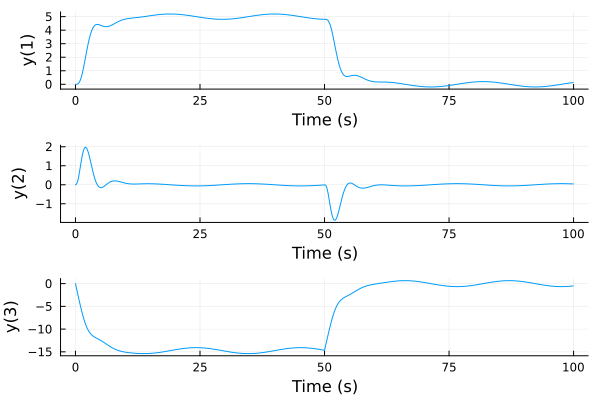

In [127]:
plot(result)

In [80]:
final_system

StateSpace{Continuous, Float64}
A = 
 0.0                 1.0  0.0                  0.0                  0.0                 0.0
 0.0                 0.0  0.0                 -2.414213562373095   -2.414213562373095  -1.000000000000001
 1.0                 0.0  0.0                  0.0                  0.0                 0.0
 1.251031730510077   0.0  0.5912277485177879  -1.251031730510077    1.0                -0.5912277485177879
 0.9573153206802254  0.0  0.2890456309839654  -3.3715288830533203  -2.414213562373095  -1.2890456309839666
 0.5912277485177879  0.0  1.3538483099735226   0.4087722514822121   0.0                -1.3538483099735226
B = 
 0.0   0.0
 1.0   0.0
 0.0  -1.0
 0.0   0.0
 0.0   0.0
 0.0   0.0
C = 
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
D = 
 0.0  0.0
 0.0  0.0
 0.0  0.0

Continuous-time state-space model

In [82]:
y, t, x, u2 = result

ControlSystemsBase.SimResult{Matrix{Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Matrix{Float64}, Matrix{Float64}, StateSpace{Continuous, Float64}}([0.0 0.002591907461050334 … -1.2106732980245234e-7 -1.1955419822913196e-7; 0.0 0.07199363417725767 … 1.9053900867295684e-8 2.6074061020000968e-8; 0.0 6.22069152901088e-5 … 6.904117720482803 6.904117712960825], 0.0:0.072:99.936, [0.0 0.002591907461050334 … -1.2106732980245234e-7 -1.1955419822913196e-7; 0.0 0.07199363417725767 … 1.9053900867295684e-8 2.6074061020000968e-8; … ; 0.0 5.1979105617932726e-5 … -1.3685236234129536 -1.368523616478898; 0.0 3.794492736148396e-5 … 6.6150720913034355 6.615072083658392], [1.0 1.0 … 1.0 1.0; 0.0 0.0 … 0.0 0.0], StateSpace{Continuous, Float64}
A = 
 0.0                 1.0  0.0                  0.0                  0.0                 0.0
 0.0                 0.0  0.0                 -2.414213562373095   -2.414213562373095  -1.000000000000001
 1.0      

In [86]:
controller |> poles

3-element Vector{ComplexF64}:
 -1.7151828680563028 + 1.7899386548590026im
 -1.7151828680563028 - 1.7899386548590026im
 -1.5887278667440885 + 0.0im

In [85]:
x

6×1389 Matrix{Float64}:
 0.0  0.00259191  0.0103651    0.0233071   …  -1.21067e-7  -1.19554e-7
 0.0  0.0719936   0.143902     0.215525        1.90539e-8   2.60741e-8
 0.0  6.22069e-5  0.000497595  0.00167885      6.90412      6.90412
 0.0  7.7302e-5   0.000612566  0.00204256     -0.957315    -0.957315
 0.0  5.19791e-5  0.000359377  0.00103574     -1.36852     -1.36852
 0.0  3.79449e-5  0.00031244   0.00108284  …   6.61507      6.61507

In [88]:
final_system.A * x

6×1389 Matrix{Float64}:
 0.0   0.0719936     0.143902     0.215525    …   1.90539e-8   2.60741e-8
 0.0  -0.000350057  -0.00265892  -0.00851449     -1.0         -1.0
 0.0   0.00259191    0.0103651    0.0233071      -1.21067e-7  -1.19554e-7
 0.0   0.00321217    0.0126696    0.0279907       1.40271e-8   2.14082e-8
 0.0   0.00206423    0.0067309    0.0120146       1.19429e-7   1.07725e-7
 0.0   0.00159685    0.00662923   0.0154216   …  -1.23055e-7  -1.21498e-7

In [99]:
my_x = zeros(6)

6-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [103]:
dt = 0.1
for i in 1:1000
    z = my_x[:, end]
    dx = final_system.A * z + final_system.B * u(z, dt * i)
    new_x = z + dx * dt
    my_x = hcat(my_x, new_x)
end

In [104]:
my_x

6×2001 Matrix{Float64}:
 0.0  0.0   0.0001  0.0003      0.0006      …  -2.87965e-15  -2.90261e-15
 0.0  0.01  0.02    0.03        0.0399999      -2.29585e-16  -1.85176e-16
 0.0  0.0   0.0     1.0e-6      4.0e-6          6.90412       6.90412
 0.0  0.0   0.0     1.25103e-6  5.00047e-6     -0.957315     -0.957315
 0.0  0.0   0.0     9.57315e-7  3.75924e-6     -1.36852      -1.36852
 0.0  0.0   0.0     5.91228e-7  2.37556e-6  …   6.61507       6.61507

In [106]:
final_system.A * my_x[:, end]

6-element Vector{Float64}:
 -1.8517649309991139e-16
 -0.9999999999999996
 -2.9026119618892537e-15
  0.0
  0.0
 -3.552713678800501e-15